In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


## Load the Data

In [4]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")  # Replace with your actual file path
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Clean the Data — Handle Nulls and Data Types

In [5]:
print(df.info())
df = df.drop_duplicates()
null_summary = df.isnull().sum()
print("Missing values per column:\n", null_summary)
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Missing values per column:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


## Detect and Handle Outliers

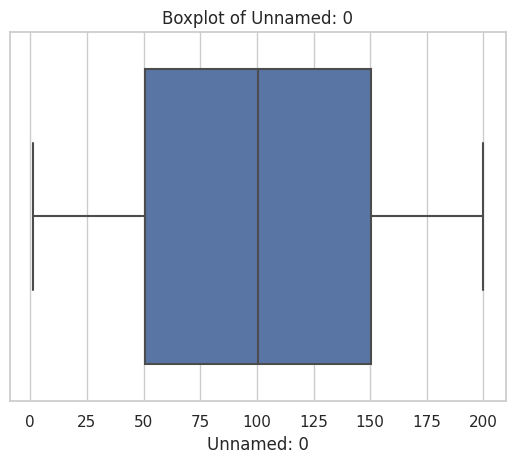

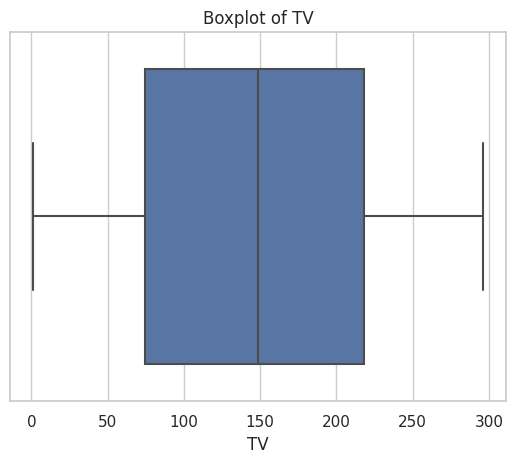

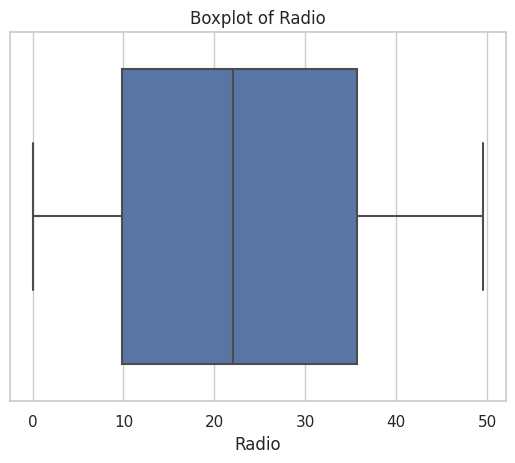

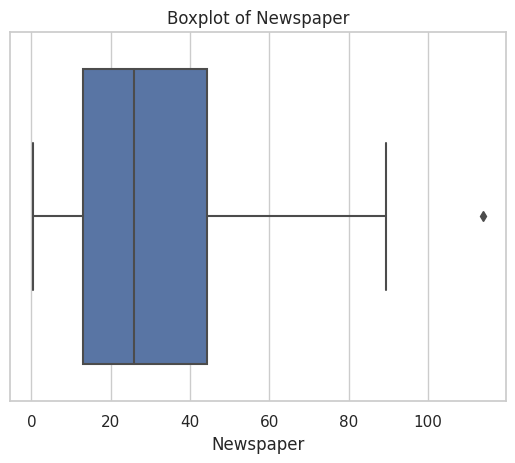

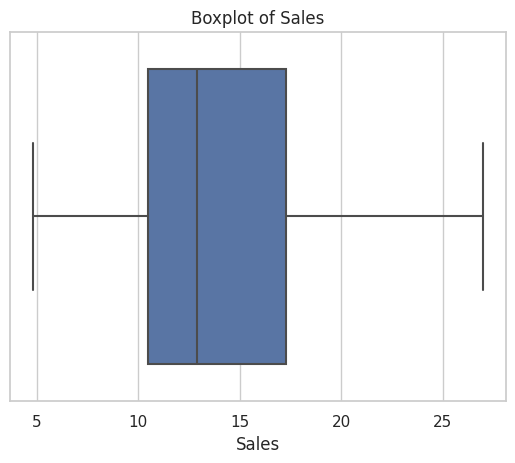

In [6]:
numerical = df.select_dtypes(include=[np.number])
for col in numerical.columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_hi)]


## Exploratory Visualizations

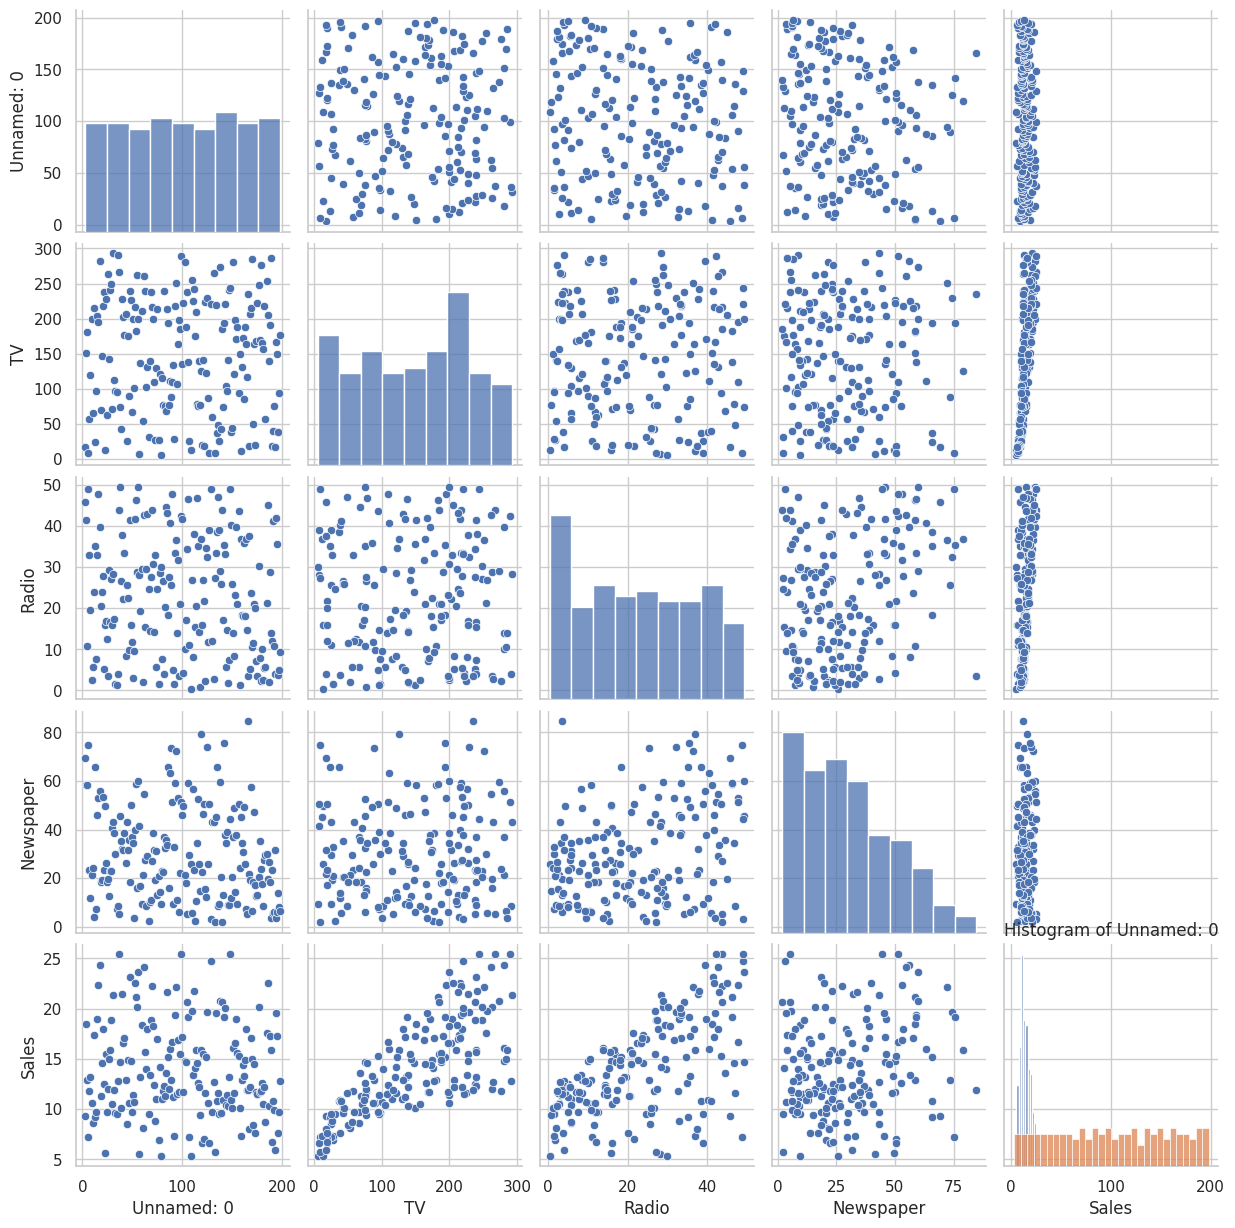

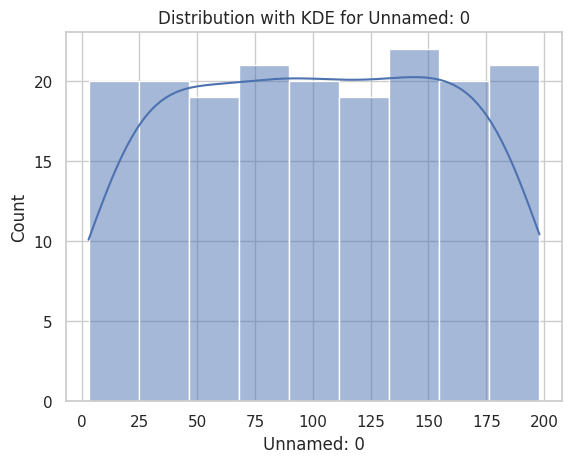

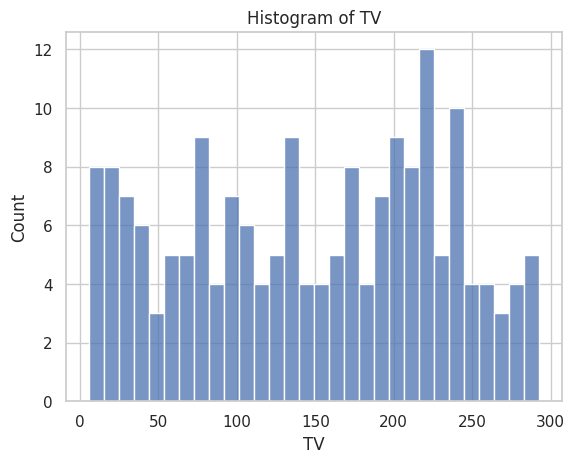

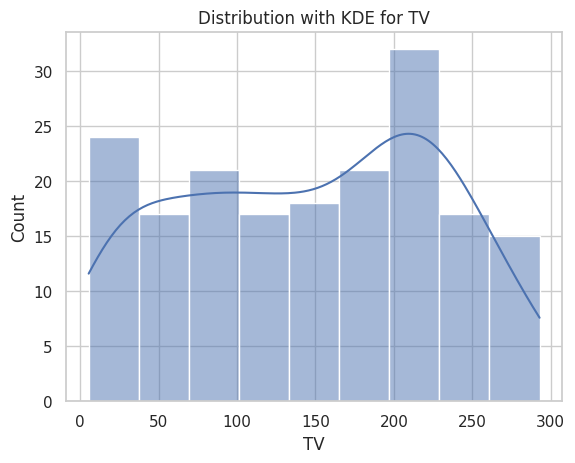

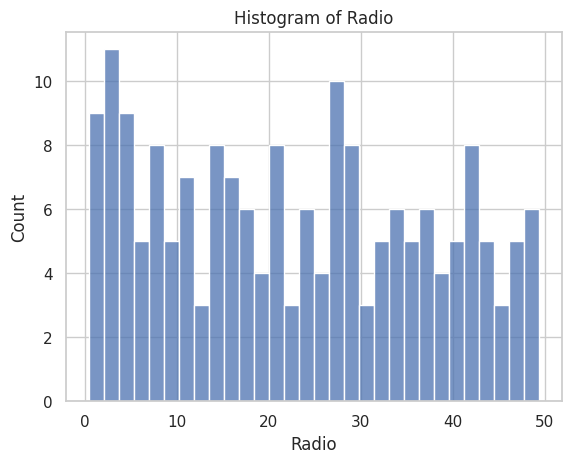

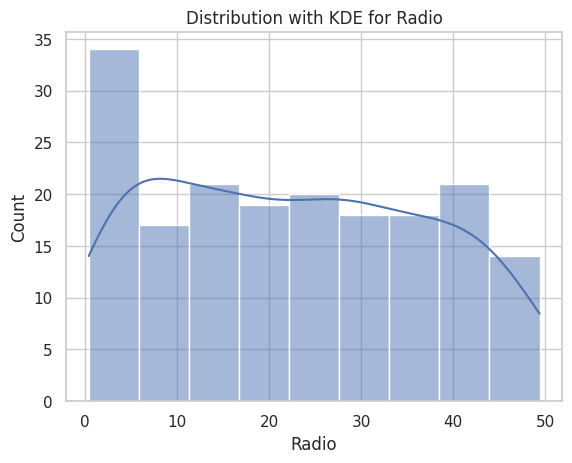

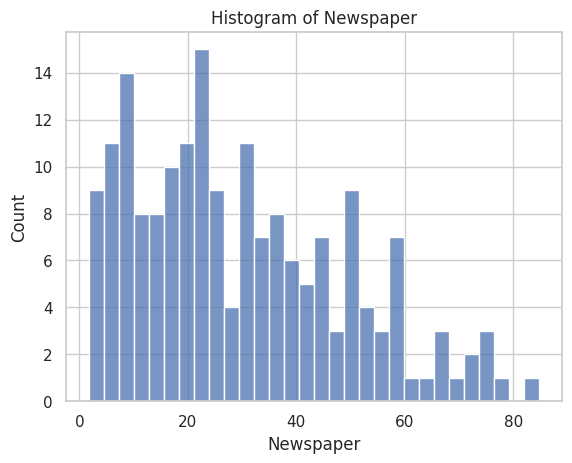

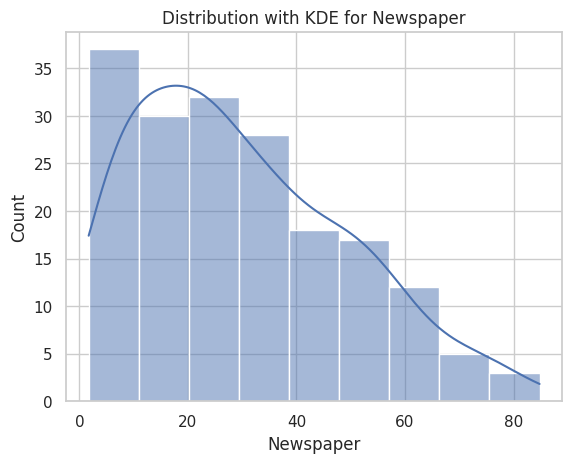

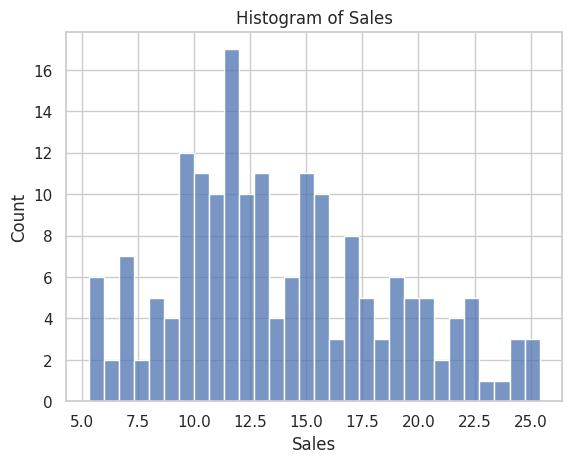

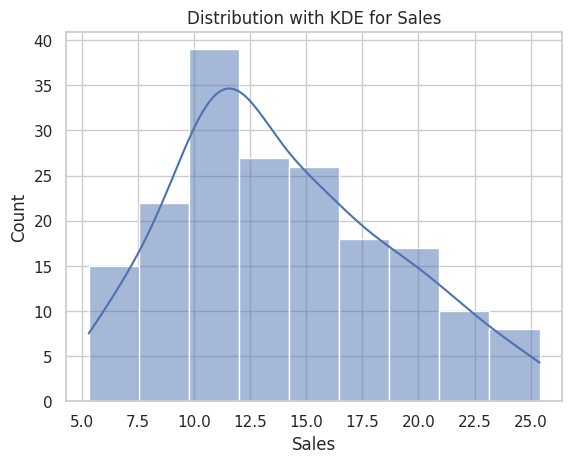

In [7]:
sns.pairplot(df)
for col in numerical.columns:
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution with KDE for {col}')
    plt.show()


## Covariance and Correlation Matrix

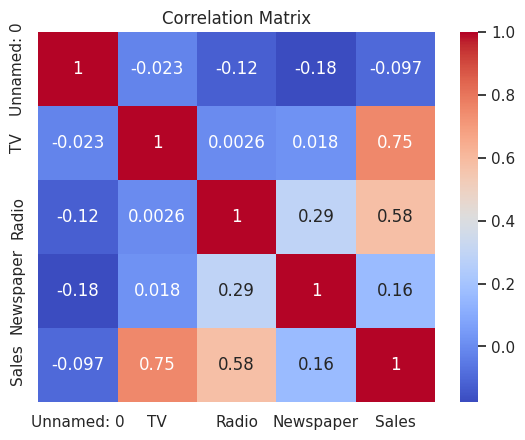

In [8]:
cov_matrix = df.cov()
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Test Normality of Distributions

Unnamed: 0: p-value=0.0000


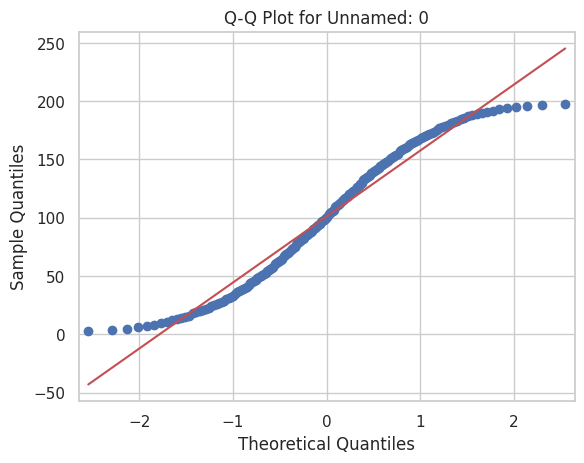

TV: p-value=0.0000


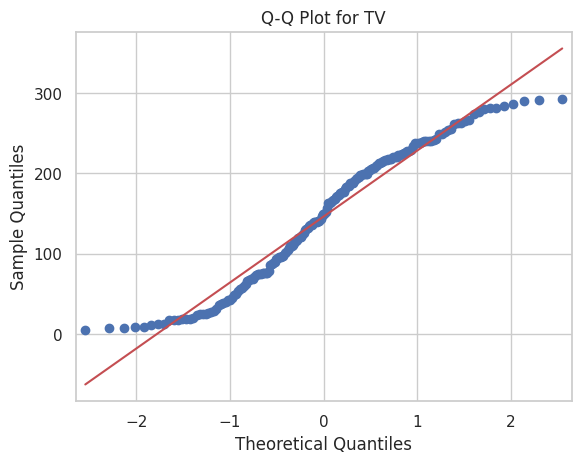

Radio: p-value=0.0000


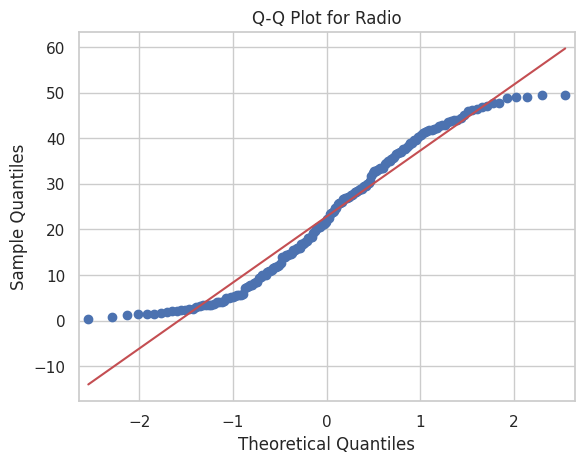

Newspaper: p-value=0.0000


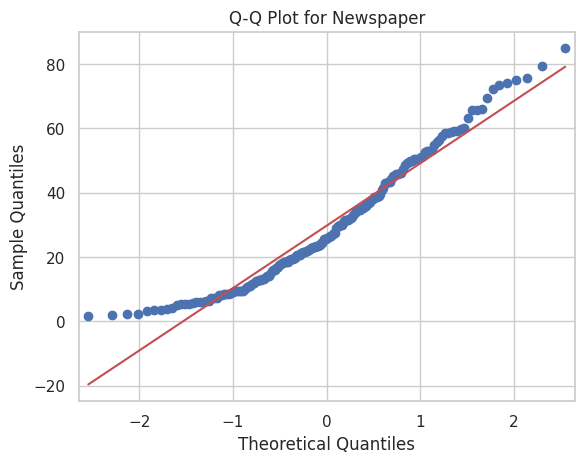

Sales: p-value=0.0007


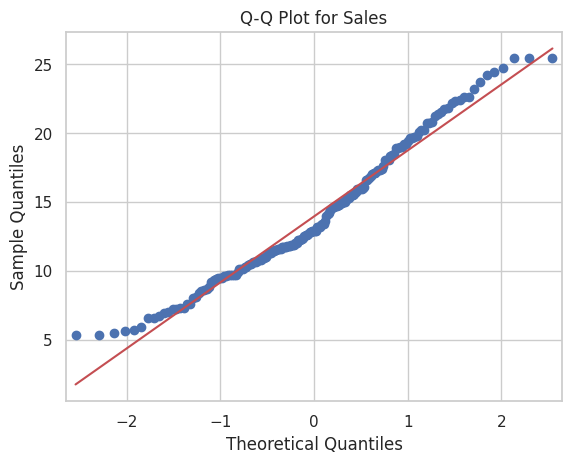

In [9]:
for col in numerical.columns:
    stat, p = stats.shapiro(df[col])
    print(f"{col}: p-value={p:.4f}")
    sm.qqplot(df[col], line='s')
    plt.title(f'Q-Q Plot for {col}')
    plt.show()


## Variance and Standard Deviation

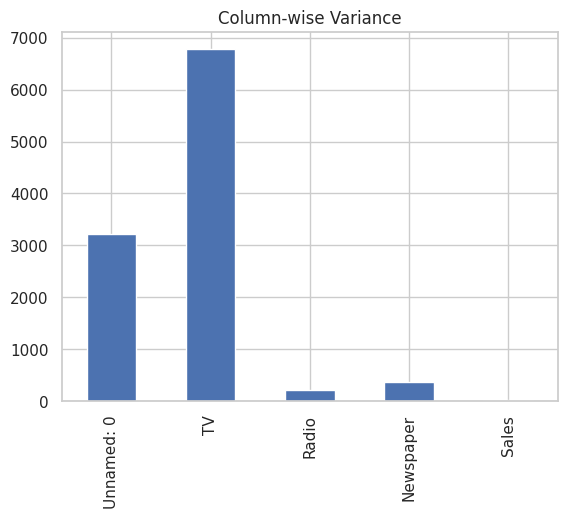

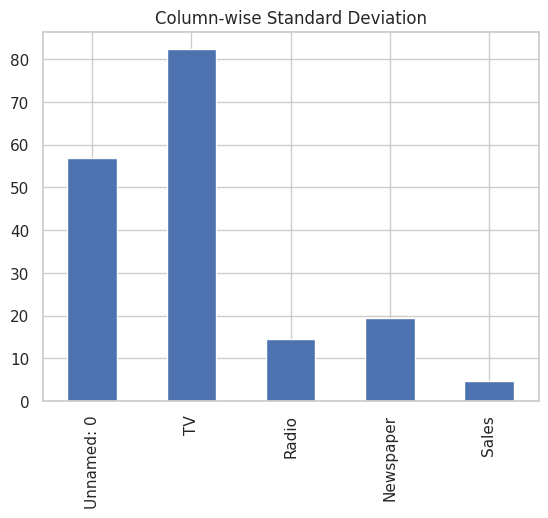

In [10]:
variances = df.var()
std_devs = df.std()
variances.plot(kind='bar', title='Column-wise Variance')
plt.show()
std_devs.plot(kind='bar', title='Column-wise Standard Deviation')
plt.show()


## Grouped Statistics by Category

In [11]:
if 'Region' in df.columns:
    print(df.groupby('Region').describe().T)


## Trends Over Time

In [12]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date').resample('M').mean().plot(figsize=(12, 6), title='Monthly Trends')
    plt.show()


## Feature Distributions Across Groups

In [13]:
categorical = df.select_dtypes(include='object').columns
for cat in categorical:
    for col in numerical.columns:
        sns.boxplot(x=df[cat], y=df[col])
        plt.title(f'{col} by {cat}')
        plt.show()


## Explore Categorical Variables

In [30]:
for cat in categorical:
    print(df[cat].value_counts())
    sns.countplot(x=df[cat])
    plt.title(f'Count Plot for {cat}')
    plt.show()


## Detect Multicollinearity — VIF

In [15]:
X = df[numerical.columns]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


      feature        VIF
0  Unnamed: 0   3.059742
1          TV  24.806860
2       Radio  14.252847
3   Newspaper   3.241216
4       Sales  67.828539


## Summary Scatter Plots

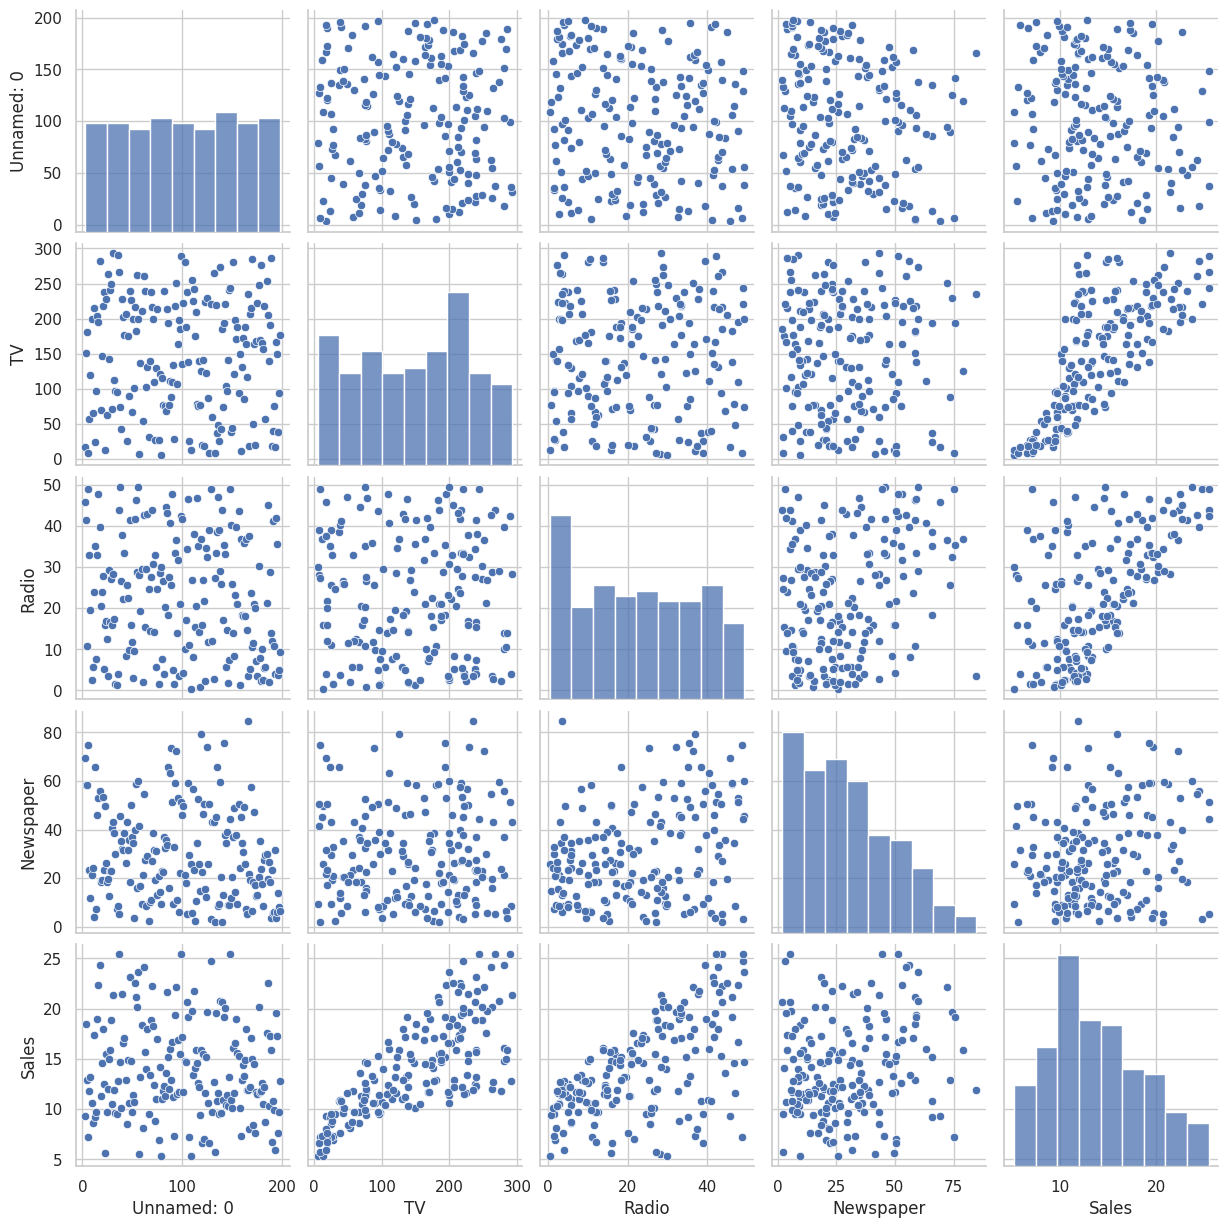

In [16]:
sns.pairplot(df, kind="scatter")


## Summary and Next Steps

In [17]:
# Placeholder for writing insights
print("Summary: Cleaned data, visualized distributions, checked correlations and trends.")


Summary: Cleaned data, visualized distributions, checked correlations and trends.


## Feature Engineering and Scaling

In [18]:
scaler = StandardScaler()
df[numerical.columns] = scaler.fit_transform(df[numerical.columns])


## Check for Class Imbalance

In [19]:
if 'Target' in df.columns:
    print(df['Target'].value_counts())


## Missing Data Patterns

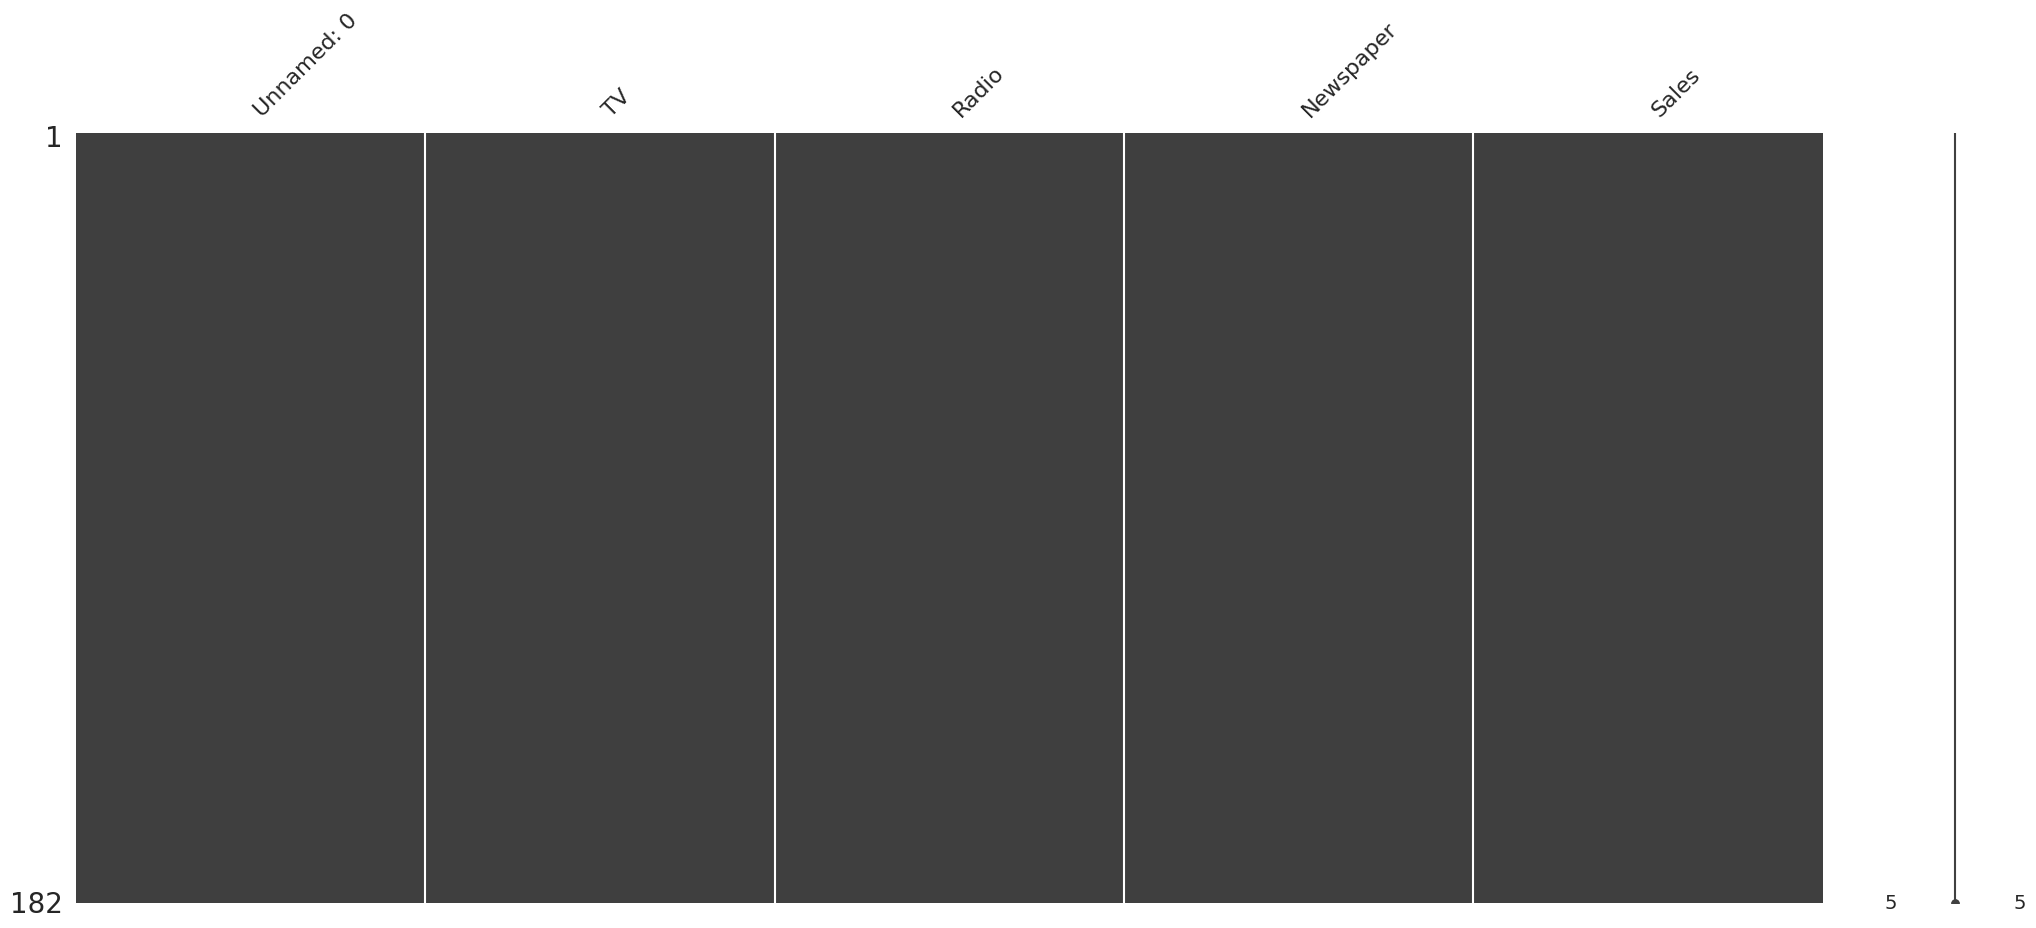

In [20]:
msno.matrix(df)
plt.show()


## Dimensionality Reduction Previews

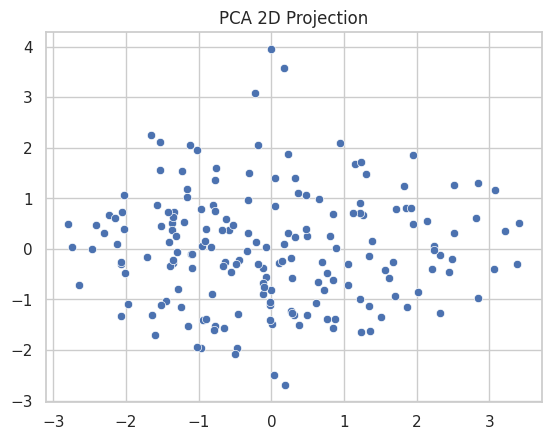

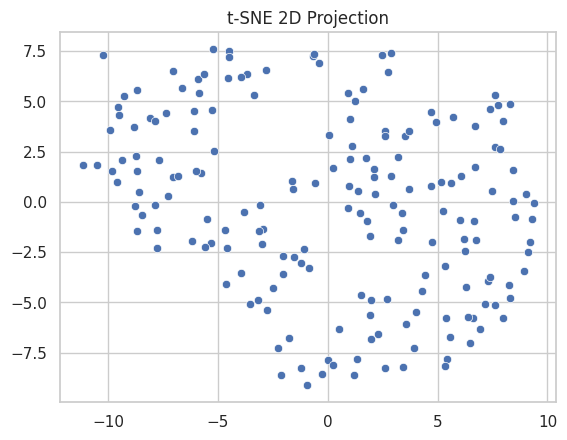

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical.columns])
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("PCA 2D Projection")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(df[numerical.columns])
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
plt.title("t-SNE 2D Projection")
plt.show()


## Time-Series Decomposition (if applicable)

In [22]:
if 'Date' in df.columns and 'Target' in df.columns:
    from statsmodels.tsa.seasonal import seasonal_decompose
    df['Date'] = pd.to_datetime(df['Date'])
    df_ts = df.set_index('Date')['Target'].resample('M').mean()
    result = seasonal_decompose(df_ts.dropna(), model='additive')
    result.plot()
    plt.show()


## Check Data Integrity

In [23]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


## Categorical Plots

In [24]:
for cat in categorical:
    sns.countplot(x=cat, data=df)
    plt.title(f'Count plot of {cat}')
    plt.xticks(rotation=45)
    plt.show()


## Correlation ≠ Causation

In [26]:
print("Correlation does not imply causation. Further domain-specific analysis needed.")


Correlation does not imply causation. Further domain-specific analysis needed.


## Data Dictionary

In [27]:
data_dict = pd.DataFrame({
    "Column": df.columns,
    "Dtype": df.dtypes.values,
    "Description": ["Add description here"] * len(df.columns)
})
print(data_dict)


       Column    Dtype           Description
0  Unnamed: 0  float64  Add description here
1          TV  float64  Add description here
2       Radio  float64  Add description here
3   Newspaper  float64  Add description here
4       Sales  float64  Add description here


## Save Cleaned Data

In [28]:
df.to_csv("cleaned_data.csv", index=False)


## Preliminary Feature Importance

In [29]:
if 'Target' in df.columns:
    X = df.drop(columns='Target')
    y = df['Target']
    model = RandomForestRegressor()
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importances")
    plt.show()
